# NAVGEM

This demonstrates how to use public data from the NAVGEM and NOGAPS model from NOMADS or GODAE.

> Note: there are not .idx files provided, so you have to download the full file and generate the .idx file with wgrib2 (requires Linux).

## NAVGEM on NOMADS

[NOMADS](https://nomads.ncep.noaa.gov/pub/data/nccf/com/fnmoc/prod/) hosts a copy of the the latest NAVGEM forecasts for the last two days.


In [1]:
import matplotlib.pyplot as plt

from herbie import Herbie
from herbie import paint
from herbie.toolbox import EasyMap, pc

In [4]:
H = Herbie("2024-06-11 00:00", model="navgem_nomads", fxx=6)

✅ Found ┊ model=navgem_nomads ┊ product=none ┊ 2024-Jun-11 00:00 UTC F06 ┊ GRIB2 @ nomads ┊ IDX @ None


In [5]:
H.PRODUCTS

{'none': ''}

In [6]:
H.SOURCES

{'nomads': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/fnmoc/prod/navgem.20240611/navgem_2024061100f006.grib2'}

In [7]:
# There is no index file available. Have to download the full file.
H.download()

👨🏻‍🏭 Created directory: [/home/blaylock/data/navgem_nomads/20240611]


PosixPath('/home/blaylock/data/navgem_nomads/20240611/navgem_2024061100f006.grib2')

In [8]:
# Since we have download the full file and don't have an index,
# we need to filter by keys to open the variable we want.
# (see cfgrib documentation)

ds = H.xarray(
    backend_kwargs={
        "filter_by_keys": {"shortName": "2t", "typeOfLevel": "heightAboveGround"}
    },
)
ds

/home/blaylock/GITHUB/Herbie/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


<xarray.Dataset> Size: 1MB
Dimensions:              (latitude: 361, longitude: 720)
Coordinates:
    time                 datetime64[ns] 8B 2024-06-11
    step                 timedelta64[ns] 8B 06:00:00
    heightAboveGround    float64 8B 2.0
  * latitude             (latitude) float64 3kB -90.0 -89.5 -89.0 ... 89.5 90.0
  * longitude            (longitude) float64 6kB 0.0 0.5 1.0 ... 359.0 359.5
    valid_time           datetime64[ns] 8B ...
    gribfile_projection  object 8B None
Data variables:
    t2m                  (latitude, longitude) float32 1MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             fnmo
    GRIB_centreDescription:  US Navy - Fleet Numerical Oceanography Center
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US Navy - Fleet Numerical Oceanography Center
    model:                   navgem_nomads
    product:                 none
    description:             Navy Global Environment Model (NAVGEM) from NOMADS.
    remote_grib:             /home/blaylock/data/navgem_nomads/20240611/navge...
    local_grib:              /home/blaylock/data/navgem_nomads/20240611/navge...
    search:                  None

Text(0.0, 1.0, 'NAVGEM_NOMADS: 00:00 UTC 11 Jun 2024 F006')

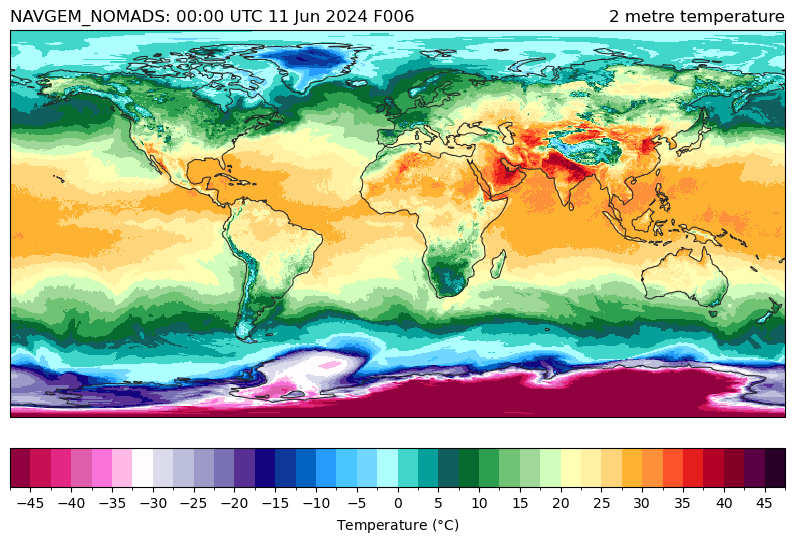

In [9]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[10, 8]).ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m - 273.15,
    transform=pc,
    **paint.NWSTemperature.kwargs2,
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **paint.NWSTemperature.cbar_kwargs2
)

ax.set_title(ds.t2m.GRIB_name, loc="right")
ax.set_title(
    f'{H.model.upper()}: {ds.time.dt.strftime("%H:%M UTC %d %b %Y").item()} F{int(ds.step.dt.total_seconds() / 60 / 60):03d}',
    loc="left",
)

After downloading the full file, you can create an index file. (Only possible if WGRIB2 is installed and in your path)


In [10]:
from herbie import wgrib2

In [11]:
wgrib2.create_inventory_file(H.grib)

PosixPath('/home/blaylock/data/navgem_nomads/20240611/navgem_2024061100f006.grib2.idx')

In [13]:
H = Herbie("2024-06-11 00:00", model="navgem_nomads", fxx=6)
H.inventory()

✅ Found ┊ model=navgem_nomads ┊ product=none ┊ 2024-Jun-11 00:00 UTC F06 ┊ GRIB2 @ local ┊ IDX @ None


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,421,172266.0,421-172266,2024-06-11,2024-06-11 06:00:00,ACPCP,surface,0-6 hour acc fcst,:ACPCP:surface:0-6 hour acc fcst
1,2,172267,408146.0,172267-408146,2024-06-11,2024-06-11 06:00:00,APCP,surface,0-6 hour acc fcst,:APCP:surface:0-6 hour acc fcst
2,3,408147,643549.0,408147-643549,2024-06-11,2024-06-11 06:00:00,TMP,max wind,6 hour fcst,:TMP:max wind:6 hour fcst
3,4,643550,917714.0,643550-917714,2024-06-11,2024-06-11 06:00:00,HGT,max wind,6 hour fcst,:HGT:max wind:6 hour fcst
4,5,917715,1246460.0,917715-1246460,2024-06-11,2024-06-11 06:00:00,PRES,max wind,6 hour fcst,:PRES:max wind:6 hour fcst
...,...,...,...,...,...,...,...,...,...,...
86,87,18346863,18701766.0,18346863-18701766,2024-06-11,2024-06-11 06:00:00,UGRD,10 m above ground,6 hour fcst,:UGRD:10 m above ground:6 hour fcst
87,88,18701767,19056137.0,18701767-19056137,2024-06-11,2024-06-11 06:00:00,VGRD,10 m above ground,6 hour fcst,:VGRD:10 m above ground:6 hour fcst
88,89,19056138,19432421.0,19056138-19432421,2024-06-11,2024-06-11 06:00:00,var discipline=0 center=58 local_table=0 parmc...,19.5 m above ground,6 hour fcst,:var discipline=0 center=58 local_table=0 parm...
89,90,19432422,19791097.0,19432422-19791097,2024-06-11,2024-06-11 06:00:00,UGRD,19.5 m above ground,6 hour fcst,:UGRD:19.5 m above ground:6 hour fcst


In [14]:
H.inventory().attrs

{'url': <_io.StringIO at 0x7fdc89a5a800>,
 'source': 'generated',
 'description': 'Inventory index file for the GRIB2 file.',
 'model': 'navgem_nomads',
 'product': 'none',
 'lead_time': 6,
 'datetime': Timestamp('2024-06-11 00:00:00')}

In [15]:
H.xarray("TMP:2 m")

<xarray.Dataset> Size: 1MB
Dimensions:              (latitude: 361, longitude: 720)
Coordinates:
    time                 datetime64[ns] 8B 2024-06-11
    step                 timedelta64[ns] 8B 06:00:00
    heightAboveGround    float64 8B 2.0
  * latitude             (latitude) float64 3kB -90.0 -89.5 -89.0 ... 89.5 90.0
  * longitude            (longitude) float64 6kB 0.0 0.5 1.0 ... 359.0 359.5
    valid_time           datetime64[ns] 8B 2024-06-11T06:00:00
    gribfile_projection  object 8B None
Data variables:
    t2m                  (latitude, longitude) float32 1MB 219.5 219.2 ... 272.4
Attributes:
    GRIB_edition:            2
    GRIB_centre:             fnmo
    GRIB_centreDescription:  US Navy - Fleet Numerical Oceanography Center
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US Navy - Fleet Numerical Oceanography Center
    model:                   navgem_nomads
    product:                 none
    description:             Navy Global Environment Model (NAVGEM) from NOMADS.
    remote_grib:             /home/blaylock/data/navgem_nomads/20240611/navge...
    local_grib:              /home/blaylock/data/navgem_nomads/20240611/subse...
    search:                  TMP:2 m

## NAVGEM on GODAE

NAVGEM is archived on [GODAE](https://usgodae.org/ftp/outgoing/fnmoc/models/navgem_0.5/).

The GRIB files are organized differently, and you have to specify the level and variable. Look at the [File Naming Convention](https://usgodae.org/docs/layout/mdllayout.pns.html) and [description of levels](https://usgodae.org/docs/layout/pn_level_type_tbl.pns.html).


In [1]:
from herbie import Herbie
import xarray as xr
import numpy as np

### 2-m air temperature

In [17]:
H = Herbie(
    "2023-02-13 12:00",
    model="navgem_godae",
    product="GMET",
    level="0105_000020-000000",
    variable="air_temp",
    overwrite=True,
)
H.grib

✅ Found ┊ model=navgem_godae ┊ product=GMET ┊ 2023-Feb-13 12:00 UTC F00 ┊ GRIB2 @ navgem ┊ IDX @ None


'https://usgodae.org/ftp/outgoing/fnmoc/models/navgem_0.5/2023/2023021312/US058GMET-GR1mdl.0018_0056_00000F0RL2023021312_0105_000020-000000air_temp'

In [18]:
# Download the file
my_file = H.download()

my_file, my_file.exists()

(PosixPath('/home/blaylock/data/navgem_godae/20230213/US058GMET-GR1mdl.0018_0056_00000F0RL2023021312_0105_000020-000000air_temp'),
 True)

In [19]:
# Open data in xarray
ds = H.xarray()
ds

/home/blaylock/GITHUB/Herbie/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


<xarray.Dataset> Size: 1MB
Dimensions:              (latitude: 361, longitude: 720)
Coordinates:
    time                 datetime64[ns] 8B 2023-02-13T12:00:00
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
  * latitude             (latitude) float64 3kB -90.0 -89.5 -89.0 ... 89.5 90.0
  * longitude            (longitude) float64 6kB -0.5 0.0 0.5 ... 358.5 359.0
    valid_time           datetime64[ns] 8B ...
    gribfile_projection  object 8B None
Data variables:
    t2m                  (latitude, longitude) float32 1MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             fnmo
    GRIB_centreDescription:  US Navy - Fleet Numerical Oceanography Center
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US Navy - Fleet Numerical Oceanography Center
    model:                   navgem_godae
    product:                 GMET
    description:             Navy Global Environment Model (NAVGEM, 2013-2024...
    remote_grib:             /home/blaylock/data/navgem_godae/20230213/US058G...
    local_grib:              /home/blaylock/data/navgem_godae/20230213/US058G...
    search:                  None

Text(0.0, 1.0, 'NAVGEM_GODAE: 12:00 UTC 13 Feb 2023 F000')

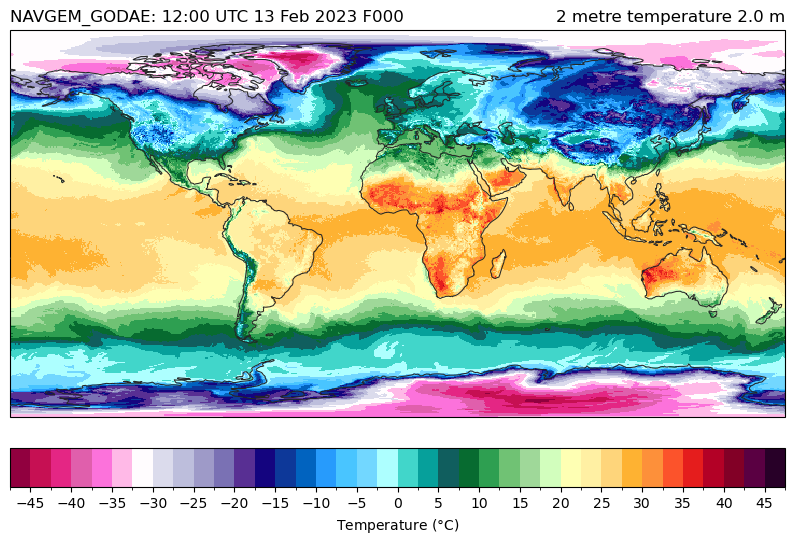

In [20]:
# Plot data
ax = EasyMap(crs=ds.herbie.crs, figsize=[10, 8]).ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m - 273.15,
    transform=pc,
    **paint.NWSTemperature.kwargs2,
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **paint.NWSTemperature.cbar_kwargs2
)

ax.set_title(
    f"{ds.t2m.GRIB_name} {float(ds[ds.t2m.GRIB_typeOfLevel])} {str(ds[ds.t2m.GRIB_typeOfLevel].units)}",
    loc="right",
)
ax.set_title(
    f'{H.model.upper()}: {ds.time.dt.strftime("%H:%M UTC %d %b %Y").item()} F{int(ds.step.dt.total_seconds() / 60 / 60):03d}',
    loc="left",
)

### 500 mb U and V wind

In [21]:
wind = [
    Herbie(
        "2023-02-13 12:00",
        model="navgem_godae",
        product="GMET",
        level="0100_005000-000000",
        variable=variable,
    ).xarray()
    for variable in ["wnd_ucmp", "wnd_vcmp"]
]


ds_wind = xr.combine_by_coords(wind, combine_attrs="drop_conflicts")
ds_wind["wspd"] = np.sqrt(ds_wind.u**2 + ds_wind.v**2)
ds_wind

✅ Found ┊ model=navgem_godae ┊ product=GMET ┊ 2023-Feb-13 12:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ None


/home/blaylock/GITHUB/Herbie/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


✅ Found ┊ model=navgem_godae ┊ product=GMET ┊ 2023-Feb-13 12:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ None


/home/blaylock/GITHUB/Herbie/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


<xarray.Dataset> Size: 3MB
Dimensions:              (latitude: 361, longitude: 720)
Coordinates:
    time                 datetime64[ns] 8B 2023-02-13T12:00:00
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 3kB -90.0 -89.5 -89.0 ... 89.5 90.0
  * longitude            (longitude) float64 6kB -0.5 0.0 0.5 ... 358.5 359.0
    valid_time           datetime64[ns] 8B 2023-02-13T12:00:00
    gribfile_projection  object 8B None
Data variables:
    u                    (latitude, longitude) float32 1MB -6.4 -6.5 ... -14.6
    v                    (latitude, longitude) float32 1MB 9.8 10.4 ... -16.7
    wspd                 (latitude, longitude) float32 1MB 11.7 12.26 ... 22.18
Attributes:
    GRIB_edition:            1
    GRIB_centre:             fnmo
    GRIB_centreDescription:  US Navy - Fleet Numerical Oceanography Center
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US Navy - Fleet Numerical Oceanography Center
    model:                   navgem_godae
    product:                 GMET
    description:             Navy Global Environment Model (NAVGEM, 2013-2024...
    search:                  None

Text(0.0, 1.0, 'NAVGEM_GODAE: 12:00 UTC 13 Feb 2023 F000')

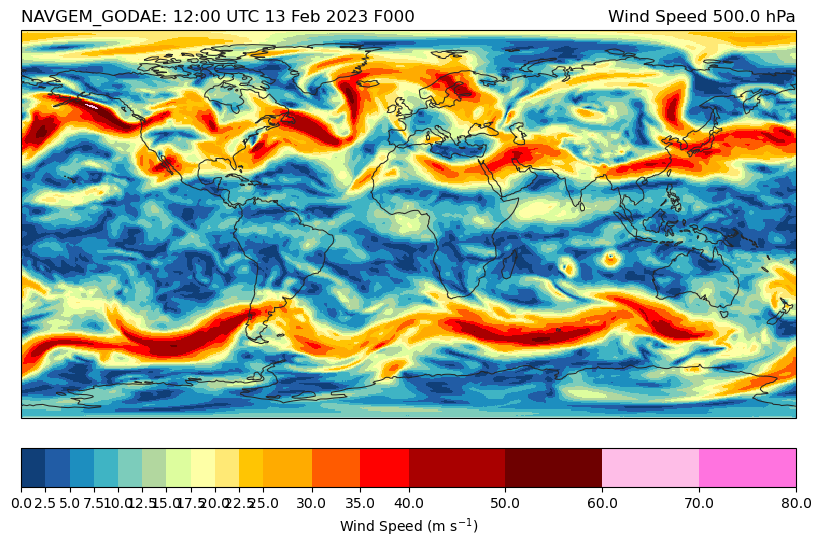

In [23]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[10, 8]).ax
p = ax.pcolormesh(
    ds_wind.longitude,
    ds_wind.latitude,
    ds_wind.wspd,
    transform=pc,
    **paint.NWSWindSpeed.kwargs2,
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **paint.NWSWindSpeed.cbar_kwargs2
)

ax.set_title(
    f"Wind Speed {float(ds_wind[ds_wind.u.GRIB_typeOfLevel])} {str(ds_wind[ds_wind.u.GRIB_typeOfLevel].units)}",
    loc="right",
)
ax.set_title(
    f'{H.model.upper()}: {ds_wind.time.dt.strftime("%H:%M UTC %d %b %Y").item()} F{int(ds_wind.step.dt.total_seconds() / 60 / 60):03d}',
    loc="left",
)

### Shortcuts

You may use wgrib-style strings in place of the `variable` (and omit `level`) for a few common variables. Please open a pull request to add additional variables to the shortcuts. Some examples:

- `TMP:2 m`
- `RH:2 m`
- `UGRD:10 m`
- `VGRD:10 m`
- `TMP:### mb` - Pressure levels
- `PRES:surface`

In [2]:
H = Herbie(
    "2024-01-04 00:00",
    model="navgem_godae",
    variable="TMP:2 m",
    fxx=6,
)

AttributeError: 'Herbie' object has no attribute 'level'

In [ ]:
H = Herbie(
    "2024-01-04 00:00",
    model="navgem_godae",
    variable="RH:500 mb",
    fxx=6,
)

## NOGAPS on GODAE

NOGAPS is the Navy Operational Global Atmospheric Prediction, the U.S Navy's model preceeding NAVGEM from 2004-2013.

In [24]:
H = Herbie(
    "2005-02-13 12:00",
    model="navgem_godae",
    product="GMET",
    level="0105_000020-000000",
    variable="air_temp",
    overwrite=True,
)
H.grib

✅ Found ┊ model=navgem_godae ┊ product=GMET ┊ 2005-Feb-13 12:00 UTC F00 ┊ GRIB2 @ nogaps ┊ IDX @ None


'https://usgodae.org/ftp/outgoing/fnmoc/models/nogaps/2005/2005021312/US058GMET-GR1mdl.0058_0240_00000F0RL2005021312_0105_000020-000000air_temp'

In [25]:
ds = H.xarray()
ds

/home/blaylock/GITHUB/Herbie/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


<xarray.Dataset> Size: 265kB
Dimensions:              (latitude: 181, longitude: 360)
Coordinates:
    time                 datetime64[ns] 8B 2005-02-13T12:00:00
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
  * latitude             (latitude) float64 1kB -90.0 -89.0 -88.0 ... 89.0 90.0
  * longitude            (longitude) float64 3kB -1.0 0.0 1.0 ... 357.0 358.0
    valid_time           datetime64[ns] 8B ...
    gribfile_projection  object 8B None
Data variables:
    t2m                  (latitude, longitude) float32 261kB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             fnmo
    GRIB_centreDescription:  US Navy - Fleet Numerical Oceanography Center
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US Navy - Fleet Numerical Oceanography Center
    model:                   navgem_godae
    product:                 GMET
    description:             Navy Global Environment Model (NAVGEM, 2013-2024...
    remote_grib:             https://usgodae.org/ftp/outgoing/fnmoc/models/no...
    local_grib:              /home/blaylock/data/navgem_godae/20050213/US058G...
    search:                  None

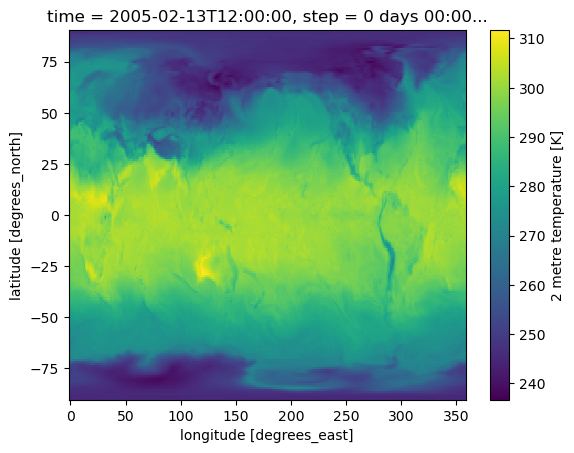

In [26]:
ds.t2m.plot()